In [14]:
import pickle

import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

from utils_plot.plot_likelihood_ratio_statistics import plot_likelihood_ratio_statistics
from utils_plot.plot_receiver_operating_characteristic_curve import plot_receiver_operating_characteristics_curve
from utils_stats.likelihood_ratio_statistic_frequency import likelihood_ratio_statistic_frequency_haploid_approximate
from utils_stats.likelihood_ratio_test import likelihood_ratio_test_threshold, likelihood_ratio_test

In [15]:
false_positive_rate = 0.05
num_snps = 40000

In [16]:
with open("../data/test/In_Pop.pkl", "rb") as f:
    genomes_pool = pickle.load(f)
genomes_pool = np.array([np.unpackbits(np.frombuffer(genome.tobytes(), dtype=np.uint8)) for genome in genomes_pool])[:, :num_snps]

In [17]:
with open("../data/test/Not_In_Pop.pkl", "rb") as f:
    genomes_reference = pickle.load(f)
genomes_reference = np.array([np.unpackbits(np.frombuffer(genome.tobytes(), dtype=np.uint8)) for genome in genomes_reference])[:, :num_snps]

In [18]:
labels_pool = np.ones(genomes_pool.shape[0])
labels_reference = np.zeros(genomes_reference.shape[0])
labels = np.concatenate((labels_pool, labels_reference), axis=0).astype(bool)

In [19]:
minor_allele_frequencies_pool = np.clip(np.mean(genomes_pool, axis=0), a_min=0.0001, a_max=0.9999)
minor_allele_frequencies_reference = np.clip(np.mean(genomes_reference, axis=0), a_min=0.0001, a_max=0.9999)

In [20]:
likelihood_ratio_statistics_pool = likelihood_ratio_statistic_frequency_haploid_approximate(minor_allele_frequencies_pool, minor_allele_frequencies_reference, genomes_pool)
likelihood_ratio_statistics_reference = likelihood_ratio_statistic_frequency_haploid_approximate(minor_allele_frequencies_pool, minor_allele_frequencies_reference, genomes_reference)
likelihood_ratio_statistics = np.concatenate((likelihood_ratio_statistics_pool, likelihood_ratio_statistics_reference), axis=0)

In [21]:
threshold = likelihood_ratio_test_threshold(likelihood_ratio_statistics, labels, false_positive_rate)

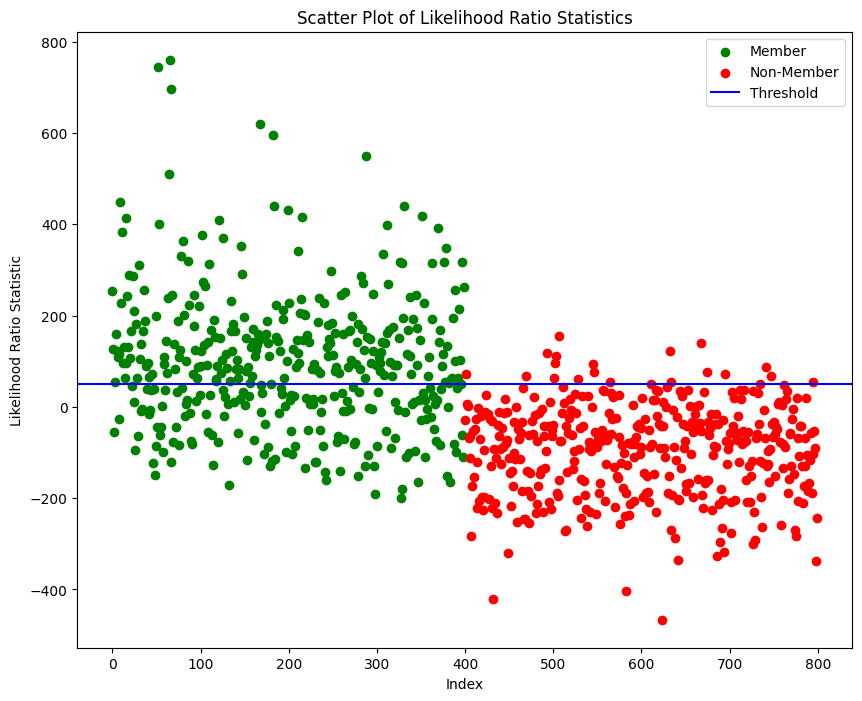

In [22]:
plot_likelihood_ratio_statistics(likelihood_ratio_statistics, labels, threshold)

In [23]:
predicted = likelihood_ratio_test(likelihood_ratio_statistics, threshold)

In [24]:
accuracy = accuracy_score(labels, predicted)
precision = precision_score(labels, predicted)
recall = recall_score(labels, predicted)
f1 = f1_score(labels, predicted)
roc_auc = roc_auc_score(labels, likelihood_ratio_statistics)
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")

Accuracy: 0.79
Precision: 0.93
Recall: 0.62
F1: 0.74
ROC AUC: 0.87


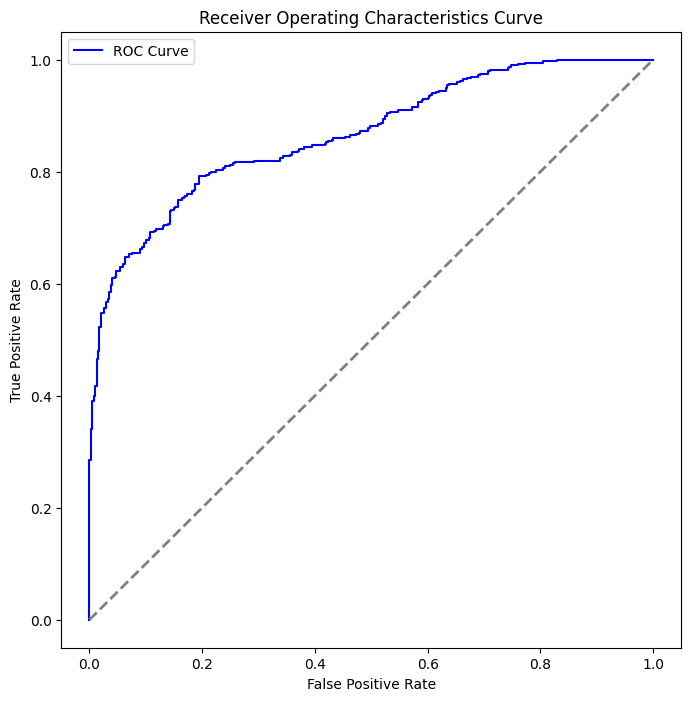

In [25]:
fpr, tpr, _ = roc_curve(labels, likelihood_ratio_statistics)
plot_receiver_operating_characteristics_curve(fpr, tpr)